In [1]:
from os import listdir
import numpy as np
import pandas as pd

In [10]:
datapath =r'C:\Users\User\Desktop\程式交易\歷史資料\大陸期貨連續月資料\m-60-OpenInterest-Difference.txt'


In [12]:

data = pd.read_csv(datapath,sep = ',',engine='python',encoding = 'utf-8')
data.columns=(['date','Open','High','Close','Low','Volume','Total Volume'])
data['date']=pd.to_datetime(data['date'])
data.set_index('date' , inplace=True)



In [23]:
data_open=data.loc[:,'Open'].resample('D').first().dropna()
data_high=data.loc[:,'High'].resample('D').max().dropna()
data_low=data.loc[:,'Low'].resample('D').min().dropna()
data_close=data.loc[:,'Close'].resample('D').last().dropna()
data_volumn=data.loc[:,'Volume'].resample('D').sum().dropna()
data_Total_Volumn=data.loc[:,'Total Volume'].resample('D').last().dropna()
data=pd.concat([data_open,data_high,data_close,data_low,data_volumn,data_Total_Volumn],axis=1).dropna()


In [24]:
data['Volatility']=data['High']-data['Low']

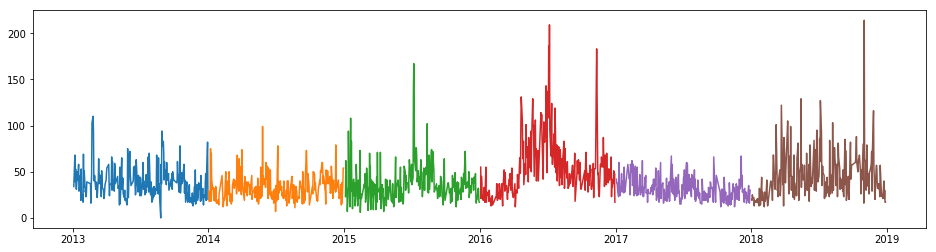

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(data['Volatility']['2013/1/1':'2014/1/1'])
plt.plot(data['Volatility']['2014/1/1':'2015/1/1'])
plt.plot(data['Volatility']['2015/1/1':'2016/1/1'])
plt.plot(data['Volatility']['2016/1/1':'2017/1/1'])
plt.plot(data['Volatility']['2017/1/1':'2018/1/1'])
plt.plot(data['Volatility']['2018/1/1':'2019/1/1'])
plt.show()

In [45]:
print(pd.DataFrame.mean(data['Volatility']['2013/1/1':'2014/1/1']))
print(pd.DataFrame.mean(data['Volatility']['2014/1/1':'2015/1/1']))
print(pd.DataFrame.mean(data['Volatility']['2015/1/1':'2016/1/1']))
print(pd.DataFrame.mean(data['Volatility']['2016/1/1':'2017/1/1']))
print(pd.DataFrame.mean(data['Volatility']['2017/1/1':'2018/1/1']))
print(pd.DataFrame.mean(data['Volatility']['2018/1/1':'2019/1/1']))


37.95798319327731
32.99593495934959
36.81782945736434
54.34016393442623
31.34016393442623
44.958847736625515
